### Churn in SyriaTel


### *Overview*

##### This dataset provides customer data from a telecommunications company, aiming to predict churn, i.e., whether a customer will stop using the service. It includes demographic and usage-related features such as call duration during different times (day, evening, night), customer service calls, and whether the customer has specific plans like international or voicemail. The target variable, churn, is binary (Yes/No). Initial analysis reveals key trends: customers with high service interactions or unusual usage patterns may be more likely to churn. The dataset offers opportunities for understanding customer behavior and identifying actionable insights to improve retention strategies.

### *1.Problem Definition*  

- **Objective**: Develop a predictive model to determine whether a customer will churn (binary classification: Yes/No) based on customer usage patterns, interaction with the company, and plan features.  
   
- **Outcome**: Provide actionable insights to SyriaTel to reduce customer churn by identifying high-risk customers and enabling targeted retention strategies.  

- **Metric for Success**: Evaluate the model's performance using metrics such as:
  - **Accuracy**: Measures overall correctness but may not address class imbalance.
  - **Precision**: Useful when minimizing false positives (e.g., targeting non-churners for retention campaigns is costly).  
  - **Recall**: Important to identify as many churners as possible (minimizing false negatives).  
  - **F1-Score**: Balances Precision and Recall, suitable for imbalanced datasets.  
  - **AUC-ROC**: Evaluates the tradeoff between true positive and false positive rates across thresholds.  



### *2. Data Collection*

- *Source*: This project utilizes a dataset obtained from Kaggle, which includes customer details such as demographics, account attributes, and usage metrics critical for predicting churn.  
- *File Format*: CSV (Comma-Separated Values).  
- *Dataset Link: *(https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

### *3.1. Data Understanding*

Data understanding lets us explore and analyze our churn data to gain insights into its structure, content, and relationships.
It involves looking at the types of data, identifying patterns, checking for missing values, and understanding the distribution of variables. The goal is to familiarize ourselves with the data before any analysis or modeling, ensuring that we can make informed decisions and address any issues, such as imbalances or outliers, that might affect the results.

In [207]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [208]:
# Read data from csv file & create dataframe. Checking the first 5 rows.
df_churn = pd.read_csv('churn_file.csv')
df_churn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [209]:
df_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [210]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [211]:
df_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

1. **state**: The state in which the customer resides.
2. **account length**: The duration (in months) the customer has had an account with the service provider.
3. **area code**: The area code associated with the customer's phone number.
4. **phone number**: The customer's phone number.
5. **international plan**: A binary indicator (yes/no) of whether the customer has an international calling plan.
6. **voice mail plan**: A binary indicator (yes/no) of whether the customer has a voicemail plan.
7. **number vmail messages**: The total number of voicemail messages received by the customer.
8. **total day minutes**: The total number of minutes the customer spent on daytime calls.
9. **total day calls**: The total number of daytime calls made by the customer.
10. **total day charge**: The total charge for daytime calls made by the customer.
11. **total eve minutes**: The total number of minutes the customer spent on evening calls.
12. **total eve calls**: The total number of evening calls made by the customer.
13. **total eve charge**: The total charge for evening calls made by the customer.
14. **total night minutes**: The total number of minutes the customer spent on nighttime calls.
15. **total night calls**: The total number of nighttime calls made by the customer.
16. **total night charge**: The total charge for nighttime calls made by the customer.
17. **total intl minutes**: The total number of minutes the customer spent on international calls.
18. **total intl calls**: The total number of international calls made by the customer.
19. **total intl charge**: The total charge for international calls made by the customer.
20. **customer service calls**: The total number of calls the customer made to customer service.
21. **churn**: A binary indicator (1/0) representing whether the customer has churned (left the service) or not.

In [212]:
df_churn.shape

(3333, 21)

### *3.2. Data Preparation*  
Data Preparation/Data cleaning will focus on preparing the dataset for exploratory data analysis (EDA) and modeling. The steps include:  
- Identifying and removing duplicate rows.  
- Handling missing/NAN values to ensure data consistency.  
- Eliminating irrelevant columns that do not contribute meaningfully to the analysis.

In [213]:
# Check for duplicated rows, no duplicated rows to deal with.
df_churn.duplicated().sum()

0

In [214]:
# Checking for missing values, no missing values.

df_churn.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [215]:
# Removing customer phone number feature as it is contact information to the client and adds no value to the analysis

df_churn.drop(['phone number','area code','state'],axis=1,inplace=True)
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We then check the number of categorical columns we have remaining and the relationship between our target, Churn, and the columns

In [216]:

categoricals = df_churn.select_dtypes("object")

for col in categoricals:
    print(df_churn[col].value_counts(), "\n")

international plan
no     3010
yes     323
Name: count, dtype: int64 

voice mail plan
no     2411
yes     922
Name: count, dtype: int64 



international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64


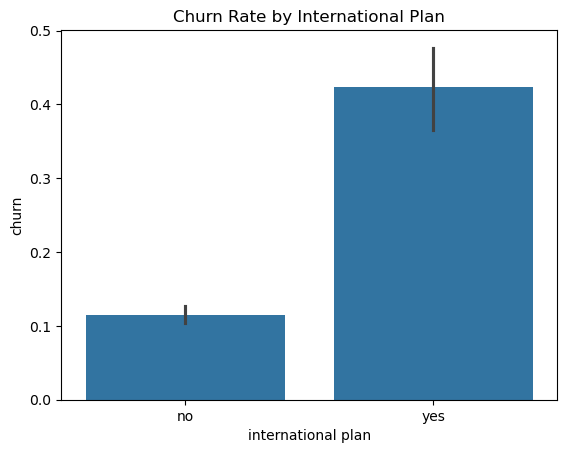

In [217]:
print(df_churn.groupby('international plan')['churn'].mean())
sns.barplot(x='international plan', y='churn', data=df_churn)
plt.title('Churn Rate by International Plan')
plt.show()

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


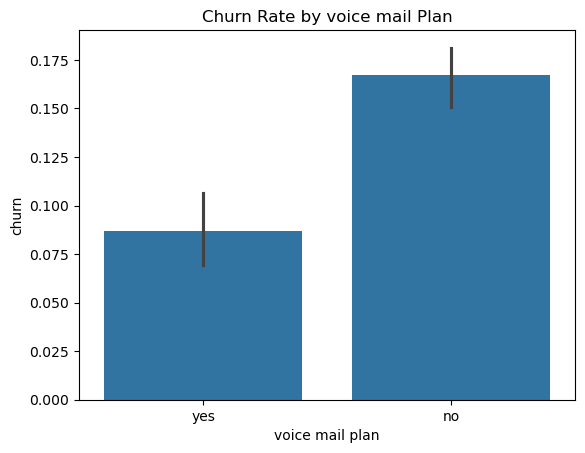

In [218]:
print(df_churn.groupby('voice mail plan')['churn'].mean())
sns.barplot(x='voice mail plan', y='churn', data=df_churn)
plt.title('Churn Rate by voice mail Plan')
plt.show()

### *3.3 EDA*

Exploratory Data Analysis (EDA) on our dataset will involve examining the churn data to understand the underlying patterns, relationships, and characteristics of the features before building any predictive models. This includes analyzing the distribution of numerical variables (e.g., total day minutes, total night calls), understanding categorical features (e.g., international plan, voice mail plan), identifying potential outliers or anomalies, checking for missing data, and exploring correlations between features. EDA also involves visualizing the data using tools like histograms, boxplots, and correlation heatmaps to uncover trends or patterns that could influence customer churn prediction, ultimately helping to make informed decisions about data preparation and modeling strategies.

We then generate boxplots to detect outliers in numerical features, helping visualize data distribution and identify extreme values that could impact analysis or modeling. By highlighting outliers, it guides data cleaning steps such as removing, transforming, or imputing extreme values and informs decisions about scaling or normalizing features to ensure consistency. 

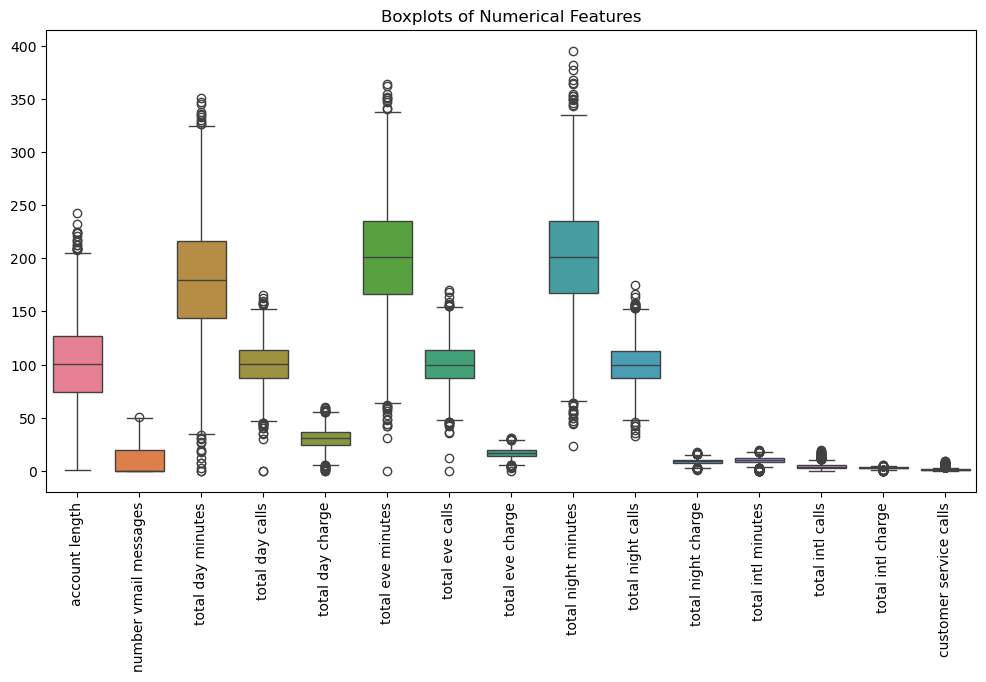

In [219]:
# Detecting outliers for numerical features using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks  (rotation = 90)
plt.show()

In [220]:
def remove_outliers(df_churn, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_churn[col].quantile(0.25)
        Q3 = df_churn[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df_churn = df_churn[(df_churn[col] >= lower_bound) & (df_churn[col] <= upper_bound)]
    
    return df_churn

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df_churn.columns if col != 'Churn' and df_churn[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df_churn = remove_outliers(df_churn, feature_columns)
df_churn

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


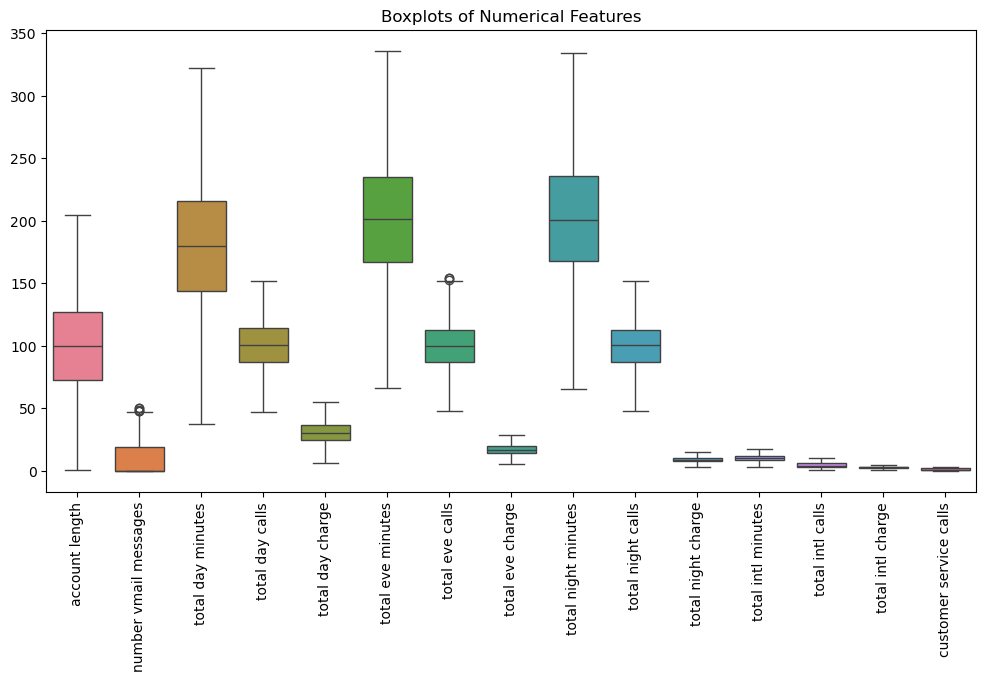

In [ ]:
# Detecting outliers for the numerical features using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks  (rotation = 90)
plt.show()

Next we convert the categorical values "yes" and "no" in the `'international plan'` and `'voice mail plan'` columns into numerical representations (1 for "yes" and 0 for "no"). This transformation makes the data suitable for machine learning algorithms, which typically require numerical inputs. By applying this mapping, the code prepares these categorical features for modeling while maintaining the information they represent.

In [222]:
# Map 'yes' to 1 and 'no' to 0 in the 'international plan' and 'voice mail' columns
df_churn['international plan'] = df_churn['international plan'].map({'yes': 1, 'no': 0})
df_churn['voice mail plan'] = df_churn['voice mail plan'].map({'yes': 1, 'no': 0})

# Display the first few rows of the updated DataFrame
df_churn.head()


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


Next we check numerical features in the `df_churn` dataset to analyze their distributions. This helps identify patterns such as skewness, outliers, data spread, and concentration of values, while also revealing potential data quality issues. Such insights guide decisions on data transformations or scaling needed for effective modeling.

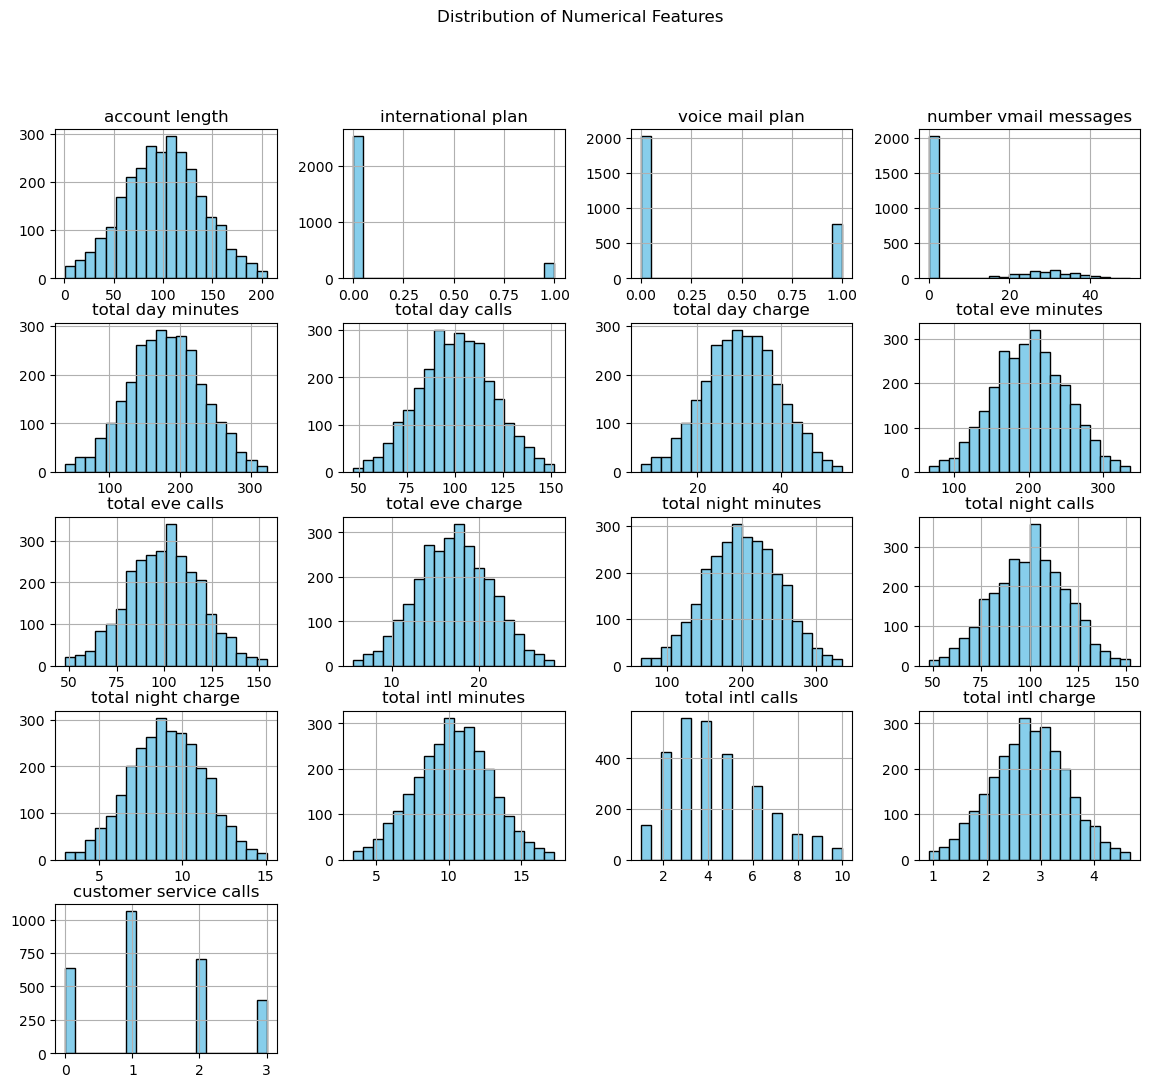

In [223]:
# Visualize distributions for Numerical features using histograms
df_churn.hist(bins=20, figsize=(14, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

Then we identify highly correlated columns  with a correlation greater than 0.9, which are considered highly redundant, and drops them from the dataset. The goal is to reduce multicollinearity and simplify the dataset by removing highly correlated features that may not provide additional useful information for modeling.


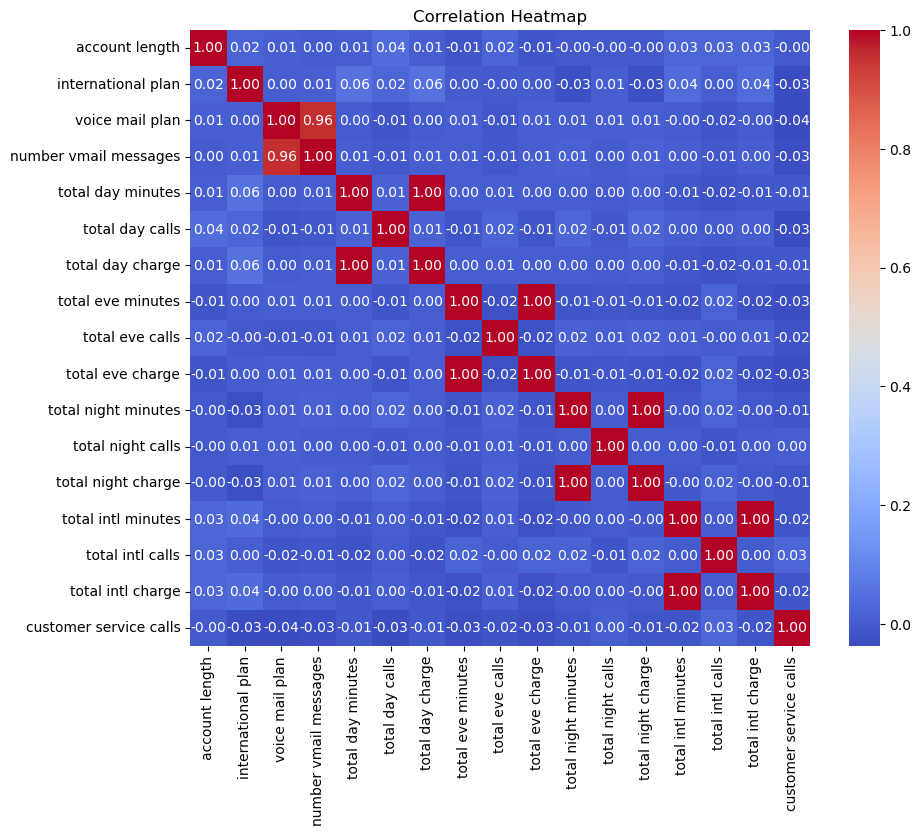

In [224]:
# Correlation heatmap for the numerical columns
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [225]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
corr_matrix = df_churn.corr().abs()

# Identify upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the columns
df_churn = df_churn.drop(columns=to_drop)

print("Dropped columns:", to_drop)

Dropped columns: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


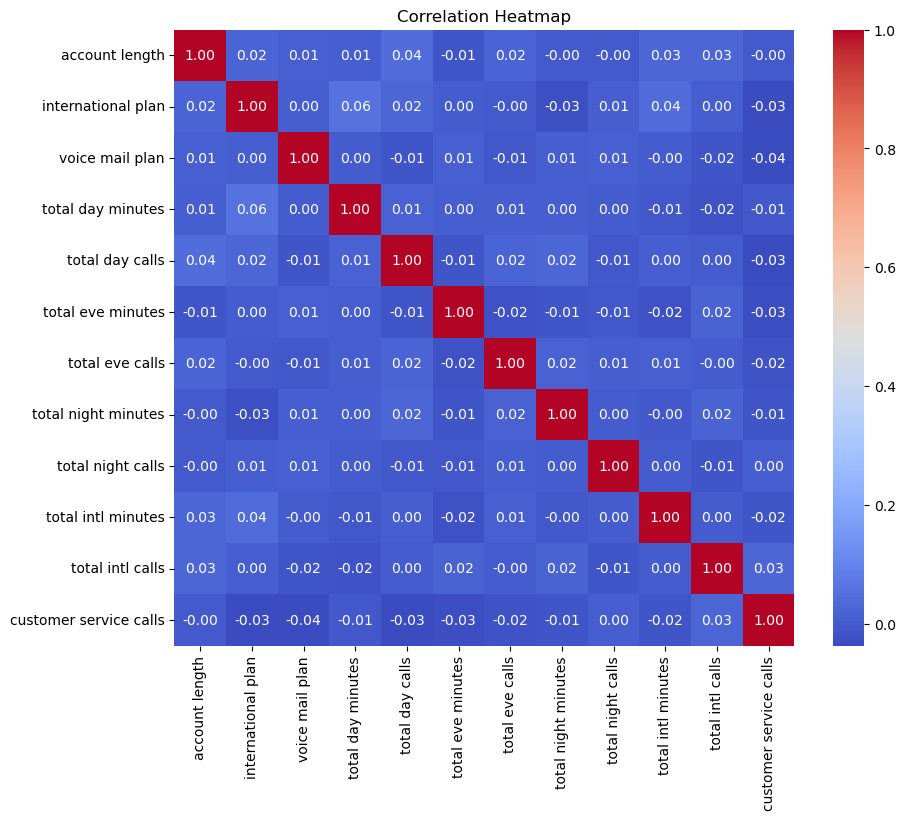

In [226]:
# Correlation heatmap for the numerical columns
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Transforming churn values into 0s and 1s so the data is compatible with the models enabling them to perform calculations and predictions. Many algorithms, especially classification models (e.g., logistic regression, decision trees, and random forests), require numeric inputs for target variables.

In [ ]:
# transforming churn values into 0s and 1s
df_churn['churn'].value_counts()
df_churn['churn'] = df_churn['churn'].map({True: 1, False: 0}).astype('int') 
df_churn.head(20)

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,118,1,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0
7,147,1,0,157.0,79,103.1,94,211.8,96,7.1,6,0,0
9,141,1,1,258.6,84,222.0,111,326.4,97,11.2,5,0,0
11,74,0,0,187.7,127,163.4,148,196.0,94,9.1,5,0,0
12,168,0,0,128.8,96,104.9,71,141.1,128,11.2,2,1,0
13,95,0,0,156.6,88,247.6,75,192.3,115,12.3,5,3,0


### *4.0 Modelling*

Now we make predictions and decisions based on data thru Modelling. After inputting data into a chosen model it will learn patterns or relationships within the data. The model's performance is assessed using evaluation metrics. The goal of modeling is to create a predictive model that generalizes well to new, unseen data, enabling it to make accurate predictions or classifications.

In [228]:
# In order to standardise the range of features to ensure they all contribute equally to the model's performance we will perform scaling
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_churn[columns].values.reshape(-1,1))

for i in df_churn.select_dtypes(include=[np.number]).columns:
    df_churn[i] = scaling(i)
df_churn.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.622549,0.0,1.0,0.798455,0.600000,0.486667,0.481132,0.665428,0.413462,0.474820,0.222222,0.333333,0.0
1,0.519608,0.0,1.0,0.435042,0.723810,0.479630,0.518868,0.701487,0.528846,0.741007,0.222222,0.333333,0.0
2,0.666667,0.0,0.0,0.722261,0.638095,0.204444,0.584906,0.360223,0.538462,0.633094,0.444444,0.000000,0.0
4,0.362745,1.0,0.0,0.452949,0.628571,0.304815,0.698113,0.450558,0.701923,0.482014,0.222222,1.000000,0.0
5,0.573529,1.0,0.0,0.652037,0.485714,0.572593,0.500000,0.513755,0.673077,0.208633,0.555556,0.000000,0.0


In [229]:
# Define X and y
y =df_churn['churn']
X = df_churn.drop(['churn'],axis=1)

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

churn
0.0    1874
1.0     223
Name: count, dtype: int64 

 churn
0.0    619
1.0     81
Name: count, dtype: int64


This gives an overview of how the target variable (churn) is distributed across both training and test sets, showing how balanced or imbalanced the data is for each class (e.g., the number of churn vs. non-churn instances). It can also be a guidance as to whether further techniques like class balancing are needed.

In [230]:
# importing the necessary libraries
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

Here we get the trained logistic regression model that has been fitted to the training data. The model will learn the relationship between the features (X_train) and the target (y_train), with no regularization applied due to the very high value of C.

In [231]:
# Importing the relevant function and  defining y_pred

from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred = logreg.predict(X_test)



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
              precision    recall  f1-score   support

    No Churn       0.91      0.97      0.94       619
       Churn       0.51      0.22      0.31        81

    accuracy                           0.89       700
   macro avg       0.71      0.60      0.62       700
weighted avg       0.86      0.89      0.87       700



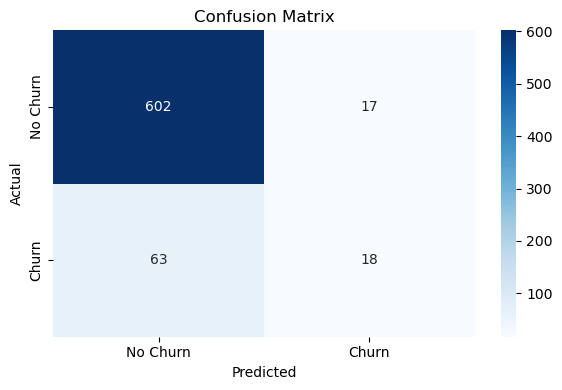

In [232]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


The confusion matrix indicates the performance of the model as follows: 

- **True Negatives (No Churn correctly predicted)**: 651 instances were correctly classified as "No Churn."  
- **False Positives (Predicted Churn but was No Churn)**: 19 instances were incorrectly classified as "Churn" when they were actually "No Churn."  
- **False Negatives (Predicted No Churn but was Churn)**: 100 instances were incorrectly classified as "No Churn" when they were actually "Churn."  
- **True Positives (Churn correctly predicted)**: 23 instances were correctly classified as "Churn."

Overall, the model performs well for identifying "No Churn" instances but struggles significantly with identifying "Churn," as evidenced by the high number of false negatives. This suggests a potential imbalance in the dataset or room for improvement in model sensitivity towards the "Churn" class.

In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print key metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")


**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
Accuracy: 0.88571
Precision: 0.51429
Recall: 0.22222
F1 Score: 0.31034


The Logistics Regressionmodel performance metrics are as follows:

Accuracy (0.88571): The model accurately predicted 88% of all instances.
Precision (0.51429): Of the cases predicted as "Churn," 51% were correct.
Recall (0.22222): The model successfully identified only 22% of the actual "Churn" cases.
F1 Score (0.31034): The low F1 score reflects poor overall performance in detecting "Churn," balancing both precision and recall.

These metrics are particularly useful for imbalanced datasets, as Accuracy alone may not reflect the model's ability to correctly identify the minority class ("Churn"). In this case, the metrics will highlight that while the model performs well in predicting "No Churn," it has lower Recall and F1 Score for "Churn," indicating room for improvement in recognizing this minority class.

In [236]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# 2. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 3. Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate performance
print("**************** RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.93000
Precision: 0.68182
Recall: 0.74074
F1 Score: 0.71006


The Random Forest model which has SMOTE applied to it clearly outperforms the Logistic Regression baseline in all metrics. While Logistic Regression shows acceptable accuracy, its poor recall and F1 score highlight its inability to effectively detect "Churn." In contrast, Random Forest demonstrates strong performance across all metrics, making it a much better choice for this problem, especially if identifying "Churn" is critical.



In [237]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Step 3: Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Step 4: Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Step 5: Best hyperparameters and model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 6: Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Step 7: Evaluate the tuned model
print("**************** TUNED RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
**************** TUNED RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.94000
Precision: 0.75325
Recall: 0.71605
F1 Score: 0.73418


The tuned Random Forest model achieves excellent performance across all metrics, significantly improving the detection of "Churn" compared to earlier models like Logistic Regression. It effectively balances precision and recall, making it reliable for applications where identifying churners accurately is critical for business strategy. The chosen hyperparameters likely enhanced the model's ability to generalize and capture the complexities of the data.

Hyperparameter tuning marginally improved overall performance, with a higher accuracy, precision, and F1 score compared to the baseline. While recall slightly decreased, the improvement in precision ensures that the tuned model is more reliable and consistent in its predictions. This makes the tuned Random Forest classifier a more robust choice, especially in scenarios prioritizing reduced false positives without sacrificing much recall.

In [238]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Step 3: Define the hyperparameter space for Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],            # Splitting criterion
    'max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],         # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],           # Minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider for the best split
    'splitter': ['best', 'random']               # Strategy for choosing the split at each node
}

# Step 4: Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt, 
    param_distributions=param_dist, 
    n_iter=100,               # Number of parameter settings sampled
    scoring='f1',             # Use F1 score to evaluate performance
    cv=5,                     # 5-fold cross-validation
    random_state=42,          # Ensures reproducibility
    verbose=2,
    n_jobs=-1                 # Use all available processors
)
random_search.fit(X_resampled, y_resampled)

# Step 5: Best hyperparameters and model
best_dt = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Step 6: Make predictions with the best model
y_pred = best_dt.predict(X_test)

# Step 7: Evaluate the tuned model
print("**************** TUNED DECISION TREE RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy'}
**************** TUNED DECISION TREE RESULTS ****************
Accuracy: 0.86143
Precision: 0.43846
Recall: 0.70370
F1 Score: 0.54028


The Decision Tree shows lower accuracy and precision compared to Random Forest, with a higher recall. It’s prone to overfitting due to its single tree structure, which could explain the imbalance between precision and recall.
The Random Forest performs well across all metrics, with high accuracy and reasonable precision and recall. Its ensemble nature (using multiple trees) helps in reducing overfitting and improving stability.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15772\3760878546.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_result_table = pd.concat([train_result_table,
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15772\3760878546.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_result_table = pd.concat([test_result_table,


*************** MODEL COMPARISON RESULTS ***************
Training Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.862025  0.901288
1  RandomForestClassifier  1.000000  1.000000
2  DecisionTreeClassifier  1.000000  1.000000

Best Model on Training Data: RandomForestClassifier (AUC: 1.000, Accuracy: 1.000)

Test Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.860986  0.885714
1  RandomForestClassifier  0.877889  0.948571
2  DecisionTreeClassifier  0.819542  0.908571

Best Model on Test Data: RandomForestClassifier (AUC: 0.878, Accuracy: 0.949)


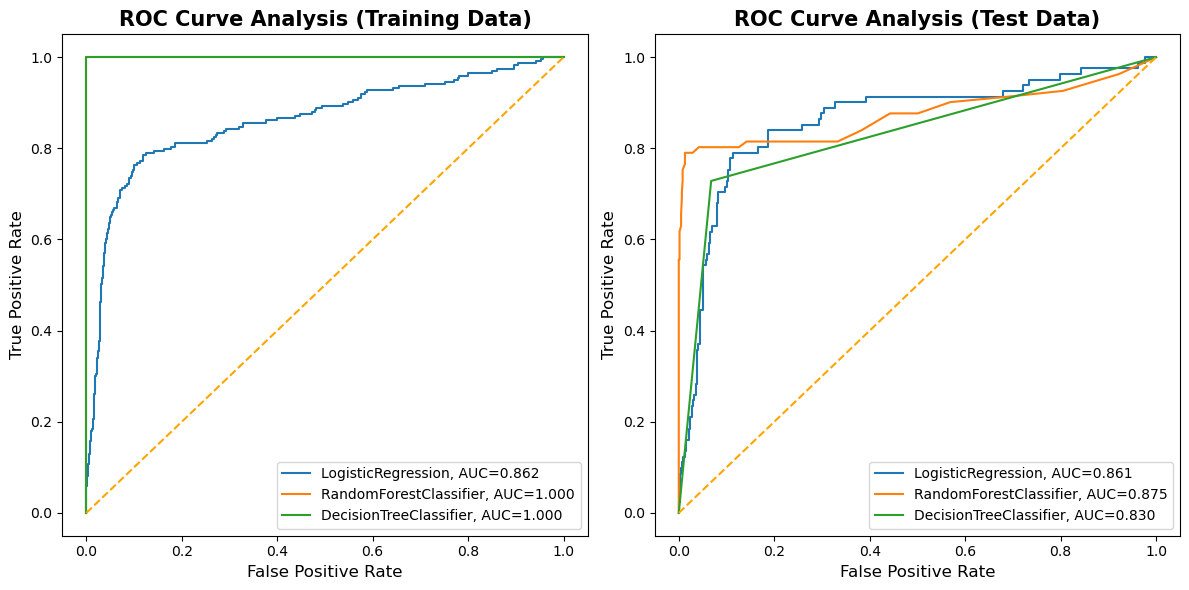

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define classifiers
classifiers = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for Logistic Regression
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

# Define result tables for training and test data
train_result_table = pd.DataFrame(columns=['classifiers', 'auc', 'accuracy'])
test_result_table = pd.DataFrame(columns=['classifiers', 'auc', 'accuracy'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # Training data predictions
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_train_pred = model.predict(X_train)
    train_auc = roc_auc_score(y_train, y_train_proba)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test data predictions
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = model.predict(X_test)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results for training and test data
    train_result_table = pd.concat([train_result_table, 
                                     pd.DataFrame({'classifiers': [cls.__class__.__name__], 
                                                   'auc': [train_auc], 
                                                   'accuracy': [train_accuracy]})], 
                                    ignore_index=True)
    test_result_table = pd.concat([test_result_table, 
                                    pd.DataFrame({'classifiers': [cls.__class__.__name__], 
                                                  'auc': [test_auc], 
                                                  'accuracy': [test_accuracy]})], 
                                   ignore_index=True)

# Identify the best model for training and test data
best_train_model = train_result_table.loc[train_result_table['auc'].idxmax()]
best_test_model = test_result_table.loc[test_result_table['auc'].idxmax()]

# Display comparison results
print("*************** MODEL COMPARISON RESULTS ***************")
print("Training Data:")
print(train_result_table)
print("\nBest Model on Training Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_train_model['classifiers'], best_train_model['auc'], best_train_model['accuracy']))

print("\nTest Data:")
print(test_result_table)
print("\nBest Model on Test Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_test_model['classifiers'], best_test_model['auc'], best_test_model['accuracy']))

# Plot ROC curves for training and test data
plt.figure(figsize=(12, 6))

# Training ROC curves
plt.subplot(1, 2, 1)
plt.title('ROC Curve Analysis (Training Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_train_proba)
    auc = roc_auc_score(y_train, y_train_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

# Test ROC curves
plt.subplot(1, 2, 2)
plt.title('ROC Curve Analysis (Test Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

plt.tight_layout()
plt.show()


Of the three models (Logistic Regression, Random Forest, and Decision Tree) based on their AUC and accuracy scores for both training and test data we can conclude as follows; 

- **Training Data Results:** Random Forest and Decision Tree models have perfect accuracy and AUC scores of 1.000, suggesting they fit the training data perfectly. However, this could indicate overfitting, as these models may have memorized the training data rather than generalizing well.
- **Test Data Results:** When evaluated on the test data, the Random Forest classifier stands out with the highest AUC (0.878) and accuracy (94.86%). It outperforms the other two models, indicating better generalization and performance on unseen data. The Decision Tree model has a relatively high accuracy but a lower AUC, suggesting it may not handle the complexity of the data as well as Random Forest. Logistic Regression also has a lower AUC and accuracy compared to Random Forest.

**Conclusion:** The Random Forest classifier is the best model to use, as it achieves the highest accuracy and AUC on both training and test data, with the best generalization capability to unseen data.